<a href="https://colab.research.google.com/github/saurabhsingh1411/av_computervision_game_of_thrones/blob/main/AV_computer_vision_gameofthrones_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing file and lib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import zipfile

In [6]:
zip_ref=zipfile.ZipFile('train.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
train_dir='/tmp/images'
train_fnames=os.listdir(train_dir)
print(train_fnames[:10])
print('total training images:',len(os.listdir(train_dir)))

['2868088.jpg', '2836704.jpg', '2898530.jpg', '1798820.jpg', '2833462.jpg', '2810911.jpg', '2894515.jpg', '2874185.jpg', '2894798.jpg', '2868113.jpg']
total training images: 8932


In [10]:
train_imgname=pd.read_csv('/tmp/train.csv')
img_name=train_imgname['image']
t=list(np.array(img_name))
t[5:10]

['621252.jpg', '2833467.jpg', '2843780.jpg', '2859567.jpg', '2896557.jpg']

In [11]:
train_imgname.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [19]:
import cv2 
X=[]

for img_name in t :
  img=cv2.imread('/tmp/images/'+img_name)
  gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X.append(gray_img)
X=np.array(X)

print(X.shape)

(6252,)


In [20]:
X[0].shape

(140, 210)

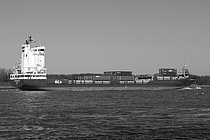

In [21]:
from google.colab.patches import cv2_imshow

cv2_imshow(X[0])

In [23]:

#img_rows=140
#img_cols=210
#X=X.reshape(X.shape[0],img_rows,img_cols,-1)
#X=X.astype('float32')
#X/=255
#print(X.shape)

In [30]:
y=train_imgname['category'].values

from keras.utils import to_categorical
y=to_categorical(y)

In [31]:
y[:10]

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [33]:
X[0].shape

(140, 210)

## Model preparation

In [35]:
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
pre_trained_model=InceptionV3(input_shape=(224,224,3),
                              include_top=False,
                              weights=None)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [37]:
last_layer=pre_trained_model.get_layer('mixed7')

print('last layer output shape:',last_layer.output_shape)
last_output=last_layer.output

last layer output shape: (None, 12, 12, 768)


In [38]:
from tensorflow.keras.optimizers import Adam

x=layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 13, stratify=y)
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape)

(((5626,), (5626, 6)), ((626,), (626, 6)))

In [41]:
train_datagen.fit(x_train)
#test_datagen.fit(y_train)

ValueError: ignored

In [42]:
from keras.callbacks import ModelCheckpoint
batch_size = 32
epochs = 30

history = model.fit(
    x_train, y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val))

ValueError: ignored

In [ ]:

score = model.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

## Creating prediction model

In [43]:
train_imgname_t=pd.read_csv('test.csv')
img_name_t=train_imgname_t['image_names']
t1=list(np.array(img_name_t))
t1[5:10]


FileNotFoundError: ignored

In [ ]:
for img_name in t :
  img=cv2.imread('/tmp/images/'+img_name)
  X_test.append(img)
X_test=np.array(X_test)

print(X_test.shape)

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(X_test[0])

In [ ]:
img_rows=224
img_cols=224
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,-1)
X_test=X_test.astype('float32')
X_test/=255
print(X_test.shape)

In [ ]:

prediction=model.predict(X_test)


## Submission

In [ ]:
sample=pd.read_csv('ss.csv')
sample['emergency_or_not']=y_classes
sample.to_csv('final_sample.csv',header=True,index=False)